In [146]:
#data science modules
import pandas as pd
import numpy as np

#scikit learn (model building and evaluation)
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import cross_validation

#scikit learn (tree drawing)
from sklearn import tree
from IPython.display import Image

#for plotting
import matplotlib.pyplot as plt

%matplotlib inline

import pickle, os, pydot, random

In [147]:
file_path = '/Users/devinjackson/Documents/data/titanic.csv'

#import the data
df_all = pd.read_csv(file_path, sep=',')
df = pd.read_csv(file_path, sep=',').dropna()

In [148]:
#get number of records for each dataset
num_records_all = df_all.shape[0]
num_records = df.shape[0]

In [149]:
names = list(df.keys())
print names

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [150]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [151]:
#define the response and feature variables
response = 'Survived'
features = [v for i, v in enumerate(names) if v not in ['Survived', 'Cabin', 'Ticket', "Fare", "Name"]]

In [152]:
#quantify categorical variables
dict_gender = {'male':0, 'female':1}
dict_embarked = {'S':0, 'C':1, 'Q':2}
df['Sex'] = df['Sex'].replace(dict_gender)
df['Embarked'] = df['Embarked'].replace(dict_embarked)

df['Survived'] = df['Survived'].astype('category')

df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')

In [153]:
#create random id vector
np.random.seed(seed=1234)
random_idx = np.random.rand(df.shape[0])

In [154]:
#split the data into test and train
df_train = df[random_idx < 0.8]
df_test = df[random_idx >= 0.8]
print len(df_train)
print len(df_test)

144
39


In [155]:
#summarize response variables
num_zeroes = df[response].value_counts()[0]
num_ones = df[response].value_counts()[1]
num_total = df[response].value_counts().sum()

#calculate ratios
ratio_zeroes = round(float(num_zeroes)/num_total, 2)
ratio_ones = round(float(num_ones)/num_total, 2)

print "Ratio of 0: " + str(ratio_zeroes)
print "Ratio of 1: " + str(ratio_ones)

# Repeat process for train and test
num_zeroes = df_train[response].value_counts()[0]
num_ones = df_train[response].value_counts()[1]
num_total = df_train[response].value_counts().sum()

ratio_zeroes = round(float(num_zeroes)/num_total, 2)
ratio_ones = round(float(num_ones)/num_total, 2)

print "Train ratio of 0: " + str(ratio_zeroes)
print "Train ratio of 1: " + str(ratio_ones)

num_zeroes = df_test[response].value_counts()[0]
num_ones = df_test[response].value_counts()[1]
num_total = df_test[response].value_counts().sum()

ratio_zeroes = round(float(num_zeroes)/num_total, 2)
ratio_ones = round(float(num_ones)/num_total, 2)

print "Test ratio of 0: " + str(ratio_zeroes)
print "Test ratio of 1: " + str(ratio_ones)

Ratio of 0: 0.33
Ratio of 1: 0.67
Train ratio of 0: 0.31
Train ratio of 1: 0.69
Test ratio of 0: 0.41
Test ratio of 1: 0.59


In [156]:
## model and fitting parameters
params_model = {'max_depth':5,'criterion':'gini'}
params_fitting = {'X':df_train[features], 'y':df_train[response]}

#build model
dt_model = DecisionTreeClassifier(**params_model).fit(**params_fitting)

In [157]:
#export dot data of dt_model
dict_tree_graph = {'decision_tree':dt_model, 'out_file':'dot_data.dot', 'feature_names':features}
tree.export_graphviz(**dict_tree_graph)

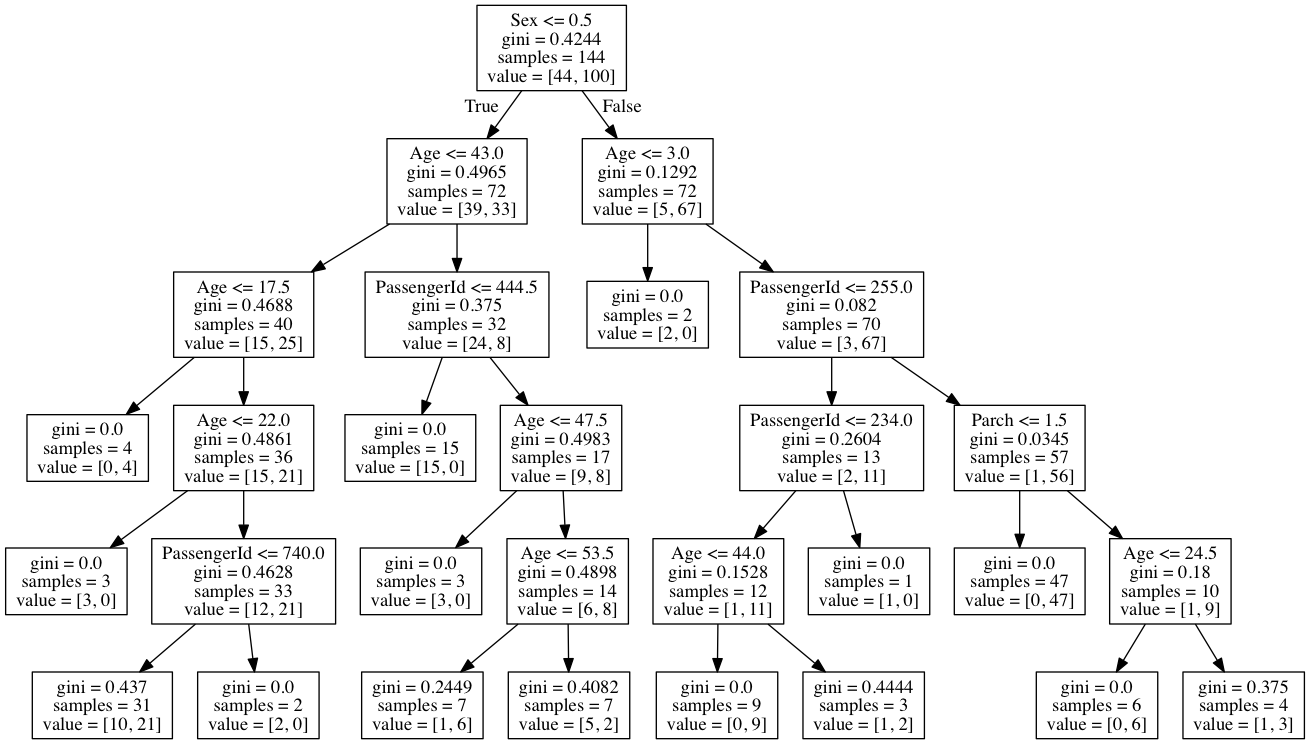

In [158]:
#import data into python and remove file
graph = pydot.graph_from_dot_file('dot_data.dot')
Image(graph.create_png())

In [159]:
#calculate predicted values
params_predict = {'X':df_test[features]}
y_predict = dt_model.predict(**params_predict)
y_actual = df_test[response].values

# calculate and print accuracy
acc = metrics.accuracy_score(y_actual, y_predict)
print "Accuracy of the models is : " + str(acc)

Accuracy of the models is : 0.769230769231


In [160]:
## Consider over fitting


#range of grid search
range_depth = np.arange(1,5,1)
range_leaf_samples = np.arange(3,5,1)

# number of samplings
num_sampling = 100

#best scores 
opt_score = 0
opt_depth = 0
opt_leaf_samples = 0

for id_sample, sample in enumerate(range(num_sampling)):
    #choose mode parameters
    depth = random.sample(range_depth, 1)[0]
    leaf_samples = random.sample(range_leaf_samples, 1)[0]
    split_samples = random.sample(range_leaf_samples, 1)[0]
    
    #build a model
    params_model = {'max_depth':depth, 'min_samples_leaf':leaf_samples, 
                   'min_samples_split':split_samples, 'criterion':'gini'}
    dt_model = DecisionTreeClassifier(**params_model)
    
    #cross validation
    params_cross_val = {'estimator':dt_model, 'X':df_train[features], 'y':df_train[response], 'cv':5}
    scores = cross_validation.cross_val_score(**params_cross_val)
    score_mean = scores.mean()
    
    #compare with optimal values
    if score_mean > opt_score:
        opt_score = score_mean
        opt_depth = depth
        opt_leaf_samples = leaf_samples
        #opt_split_samples = split_samples
        
print 'optimal score : ' + str(opt_score)
print 'optimal depth : ' + str(opt_depth)
print 'optimal leaf samples : ' + str(opt_leaf_samples)

optimal score : 0.736699507389
optimal depth : 1
optimal leaf samples : 4


depth : 1 leaf_samples : 4


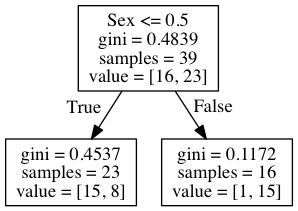

In [162]:
#build model with optimized parameters
params_model_opt = {'max_depth':opt_depth, 'min_samples_leaf':opt_leaf_samples, 'criterion':'gini'}
params_fitting = {'X':df_test[features], 'y':df_test[response]}
opt_dt_model = DecisionTreeClassifier(**params_model_opt).fit(**params_fitting)

#create dot data of opt_dt_model
dict_tree_graph = {'decision_tree':opt_dt_model, 'out_file':'dot_data.dot', 'feature_names':features}
tree.export_graphviz(**dict_tree_graph)

#import dot data in python env and remove temp file
graph = pydot.graph_from_dot_file('dot_data.dot')
os.remove('dot_data.dot')

#visualize decision tree
print 'depth : ' + str(opt_depth) + ' leaf_samples : ' + str(opt_leaf_samples)
Image(graph.create_png())

In [163]:
## Evaluate prediction performance of optimized model

params_predict = {'X':df_test[features]}
y_predict = opt_dt_model.predict(**params_predict)

y_probab = opt_dt_model.predict_proba(**params_predict)[:,1]

In [164]:
y_actual = df_test[response].values
fpr, tpr, _ = metrics.roc_curve(y_actual, y_probab)

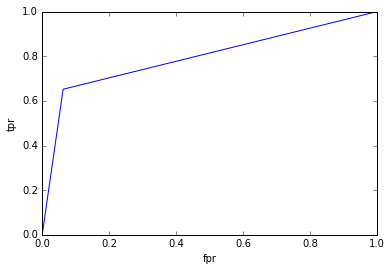

In [172]:
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [173]:
auc = metrics.roc_auc_score(y_actual, y_predict)
print 'AUC value : '  + str( round(auc, 3))

AUC value : 0.795


In [ ]:
## Additional evaluation with F1 score

th_range = np.arange(0,1,0.1)